## Investigating EccentricTD and EccentricFD in LALSuite

Simona Miller, LIGO SURF 2018, (Last edited: July 6, 2018) 

In this notebook I investigate the waveform approximants in LALSuite EccentricTD (time domain) and EccentricFD (frequency domain). I plot strain time series for differnt values of eccentricity, and then compare these waveforms to the SEOBNRv4_opt approximant that does not include eccentricity.

Note: EccentricTD does not have include spin effects. 

In [25]:
from pycbc import catalog
from pycbc.waveform import get_td_waveform, get_fd_waveform
from pycbc.waveform import td_approximants, fd_approximants
from pycbc.fft import fft

import numpy as np
import scipy as sp
import pylab

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [26]:
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14)

In [27]:
# List of td approximants that are available
print td_approximants()

# List of fd approximants that are currently available
print fd_approximants()

['TEOBResum_ROM', 'TaylorEt', 'SEOBNRv3_opt', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'EOBNRv2', 'NRSur7dq2', 'TEOBv4', 'SEOBNRv4_opt', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'NR_hdf5', 'TEOBv2', 'SEOBNRv3_pert', 'EOBNRv2HM', 'SpinTaylorT4', 'TaylorT1', 'TaylorT3', 'TaylorT2', 'HGimri', 'TaylorT4', 'IMRPhenomD', 'IMRPhenomPv2', 'SEOBNRv1', 'SpinDominatedWf', 'SEOBNRv3', 'SEOBNRv2', 'SpinTaylorT1', 'SEOBNRv4', 'SpinTaylorT2', 'EccentricTD', 'SEOBNRv2_opt', 'SEOBNRv3_opt_rk4']
['TaylorF2', 'SEOBNRv2_ROM_EffectiveSpin', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'IMRPhenomD', 'SpinTaylorT2Fourier', 'IMRPhenomPv2_INTERP', 'SpinTaylorT4Fourier', 'TaylorF2NLTides', 'IMRPhenomD_INTERP', 'SEOBNRv2_ROM_DoubleSpin', 'IMRPhenomP', 'SpinTaylorF2', 'SEOBNRv2_ROM_DoubleSpin_INTERP', 'SEOBNRv1_ROM_DoubleSpin_INTERP', 'EOBNRv2_ROM_INTERP', 'TaylorF2_INTERP', 'SEOBNRv2_ROM_DoubleSpin_HI', 'SpinTaylorF2_INTERP', 'TaylorF2NL_INTERP', 'EOBNRv2_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin',

In [28]:
# plus and cross polarizations from eccentric waveform in time domain
hp, hc = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=0.4,
                         f_lower=20)

(-0.25, 0.001)

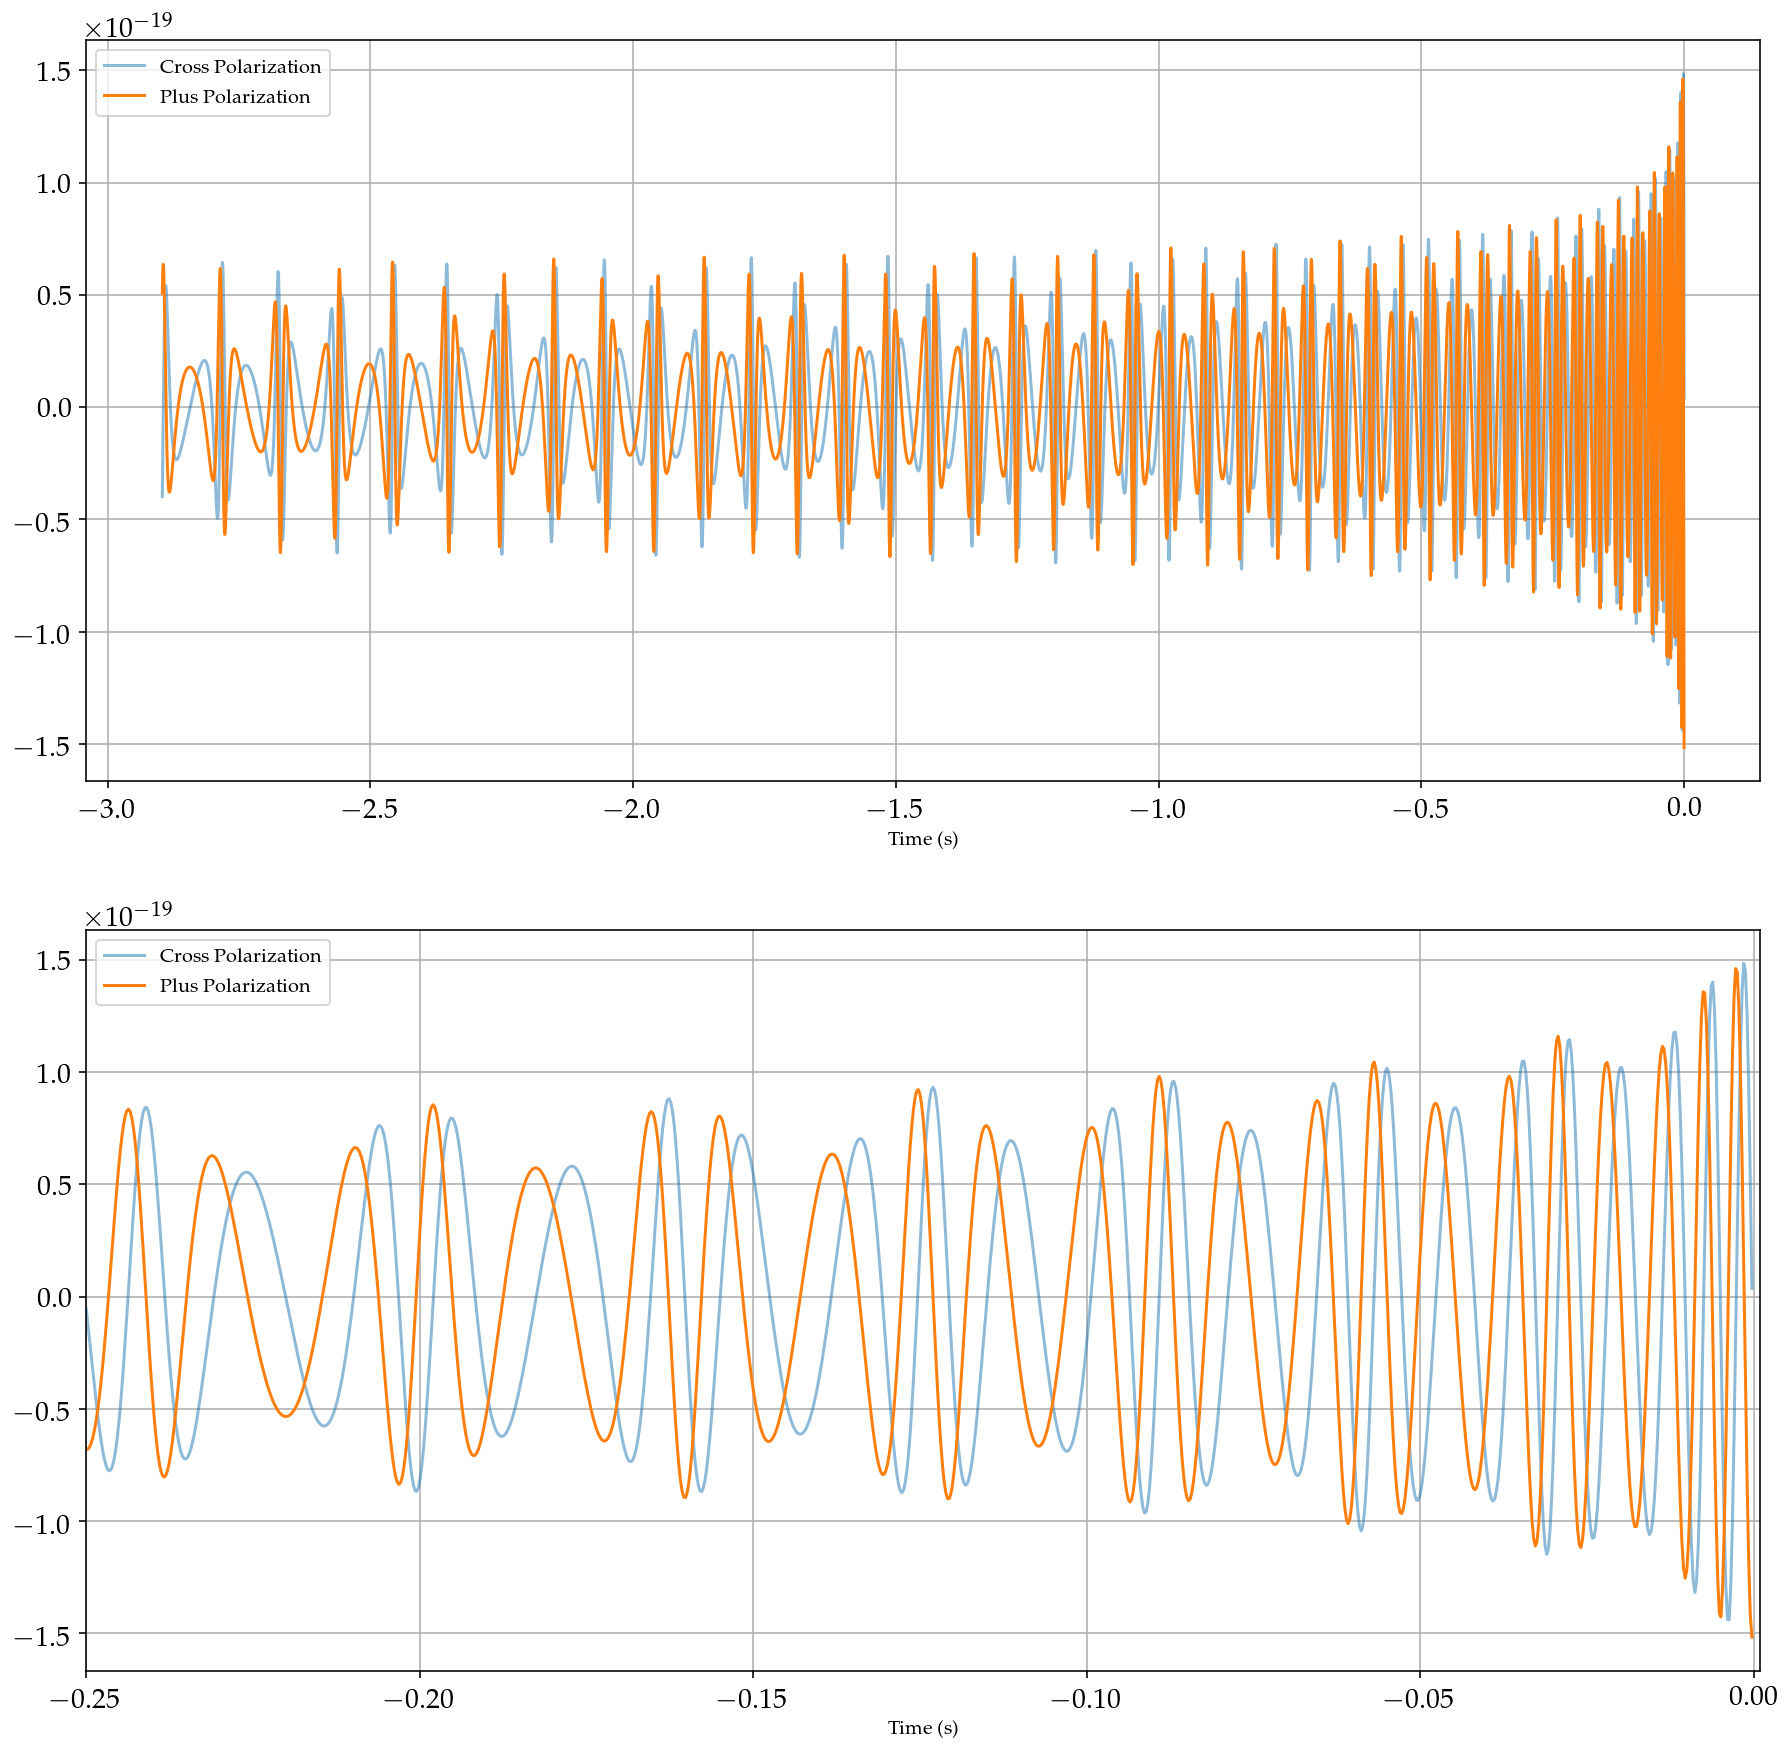

In [29]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.plot(hp.sample_times, hc, label='Cross Polarization', alpha=0.5)
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(hp.sample_times, hc, label='Cross Polarization', alpha=0.5)
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.xlim(-0.25,0.001)

In [30]:
# plus and cross polarizations from eccentric waveform in frequency domain
hp_f, hc_f = get_fd_waveform(approximant="EccentricFD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=0.4,
                         delta_f=1.0/8, 
                         f_lower=20)

(25, 300)

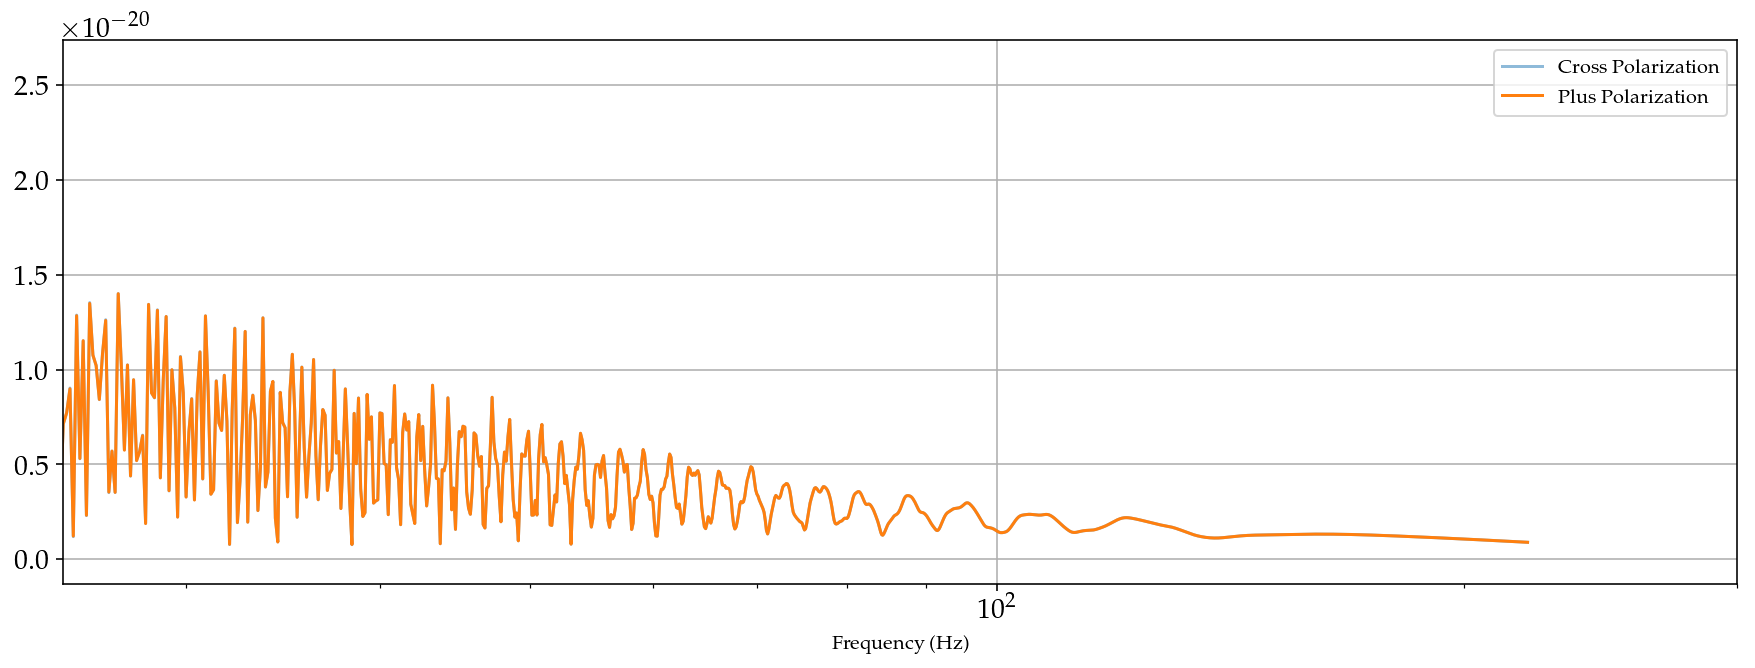

In [31]:
plt.figure(figsize=(15,5))
plt.semilogx(hc_f.sample_frequencies, np.absolute(hc_f), label='Cross Polarization',alpha=0.5)
plt.semilogx(hp_f.sample_frequencies, np.absolute(hp_f), label='Plus Polarization')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.grid()
plt.xlim(25,300)

## Looking at different eccentricities

In [32]:
# Initial eccentricities
e0 = [0.0001,0.001,0.01, 0.1, 0.3, 0.5]

In [33]:
# -- IN TIME DOMAIN --

# Initialize dicts containing h+ and hx time series for each initial eccentricity
hpTDdict = {}
hcTDdict = {}

# Cycle through all initial eccentricities
for e in e0: 
    
    hp, hc = get_td_waveform(approximant="EccentricTD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e,
                         f_lower=20)
    
    # Add time series to dict
    key = e
    hpTDdict[key] = hp 
    hcTDdict[key] = hc

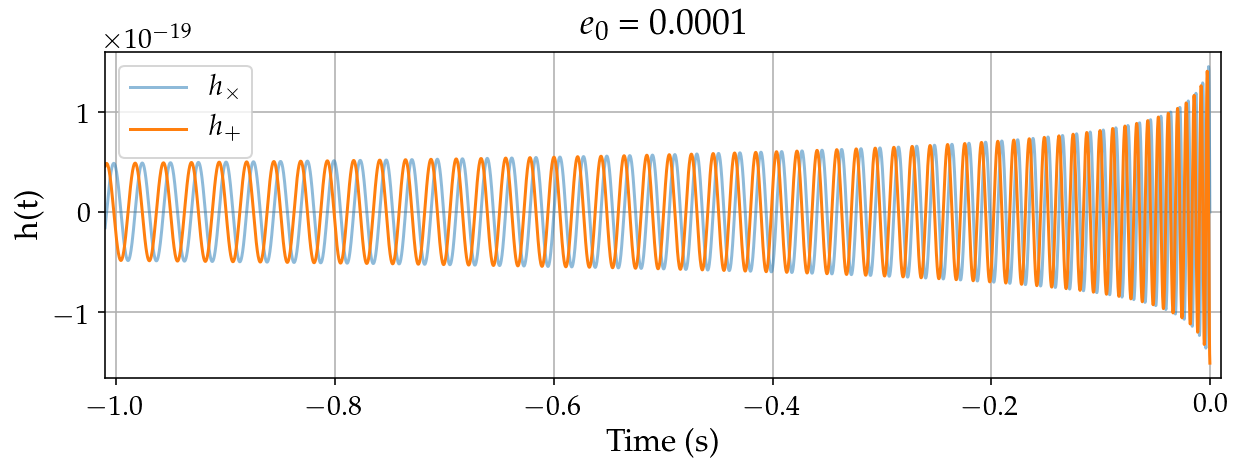

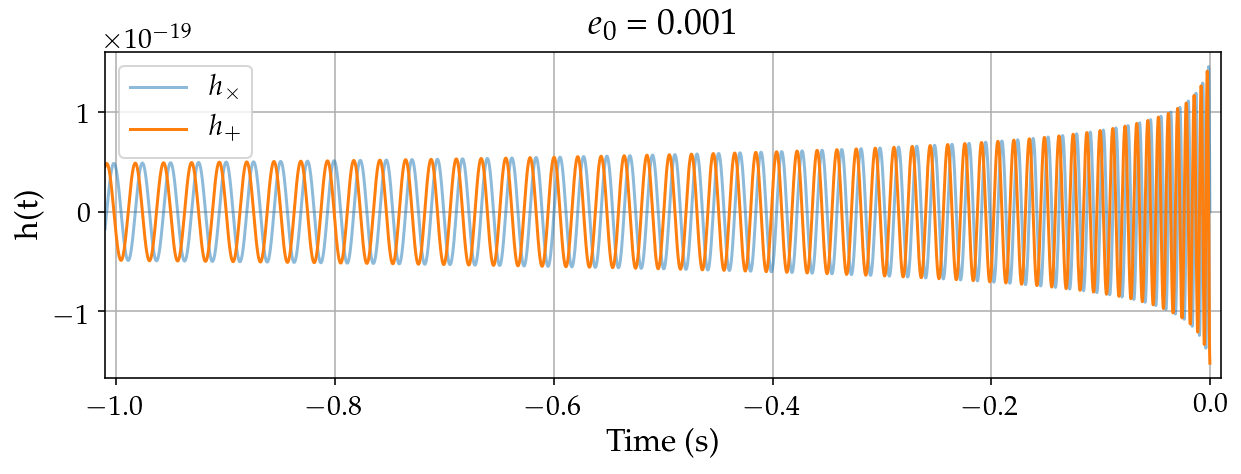

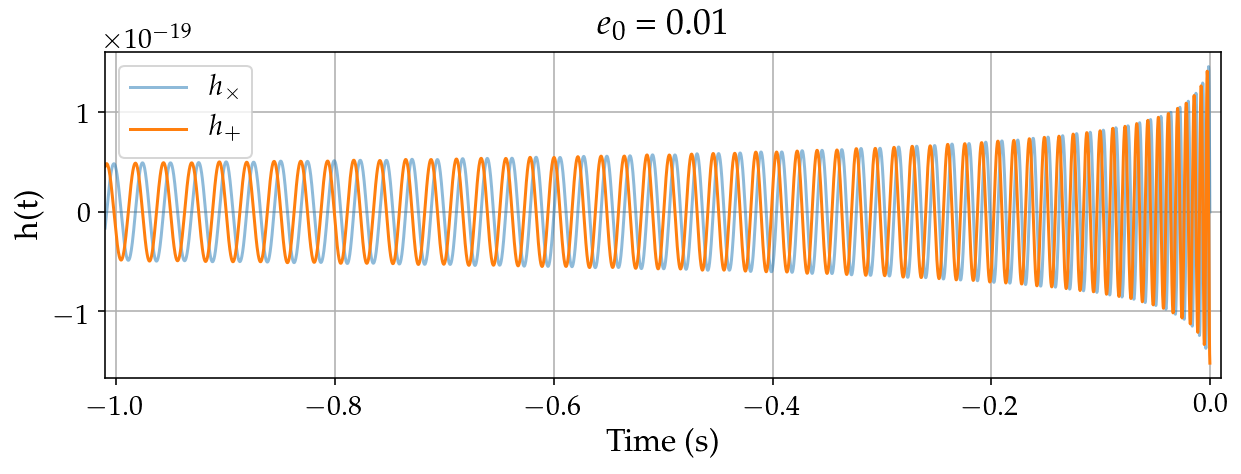

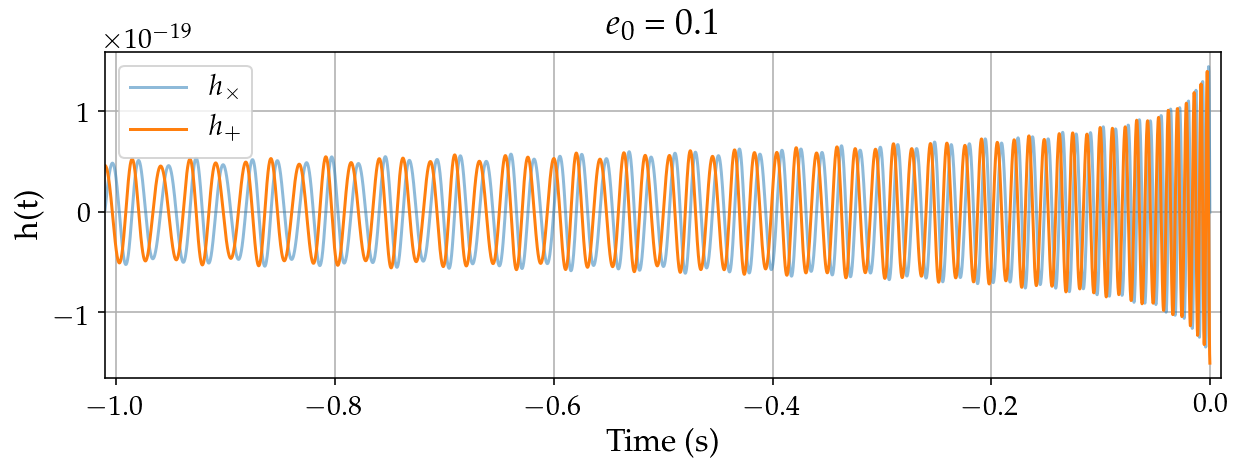

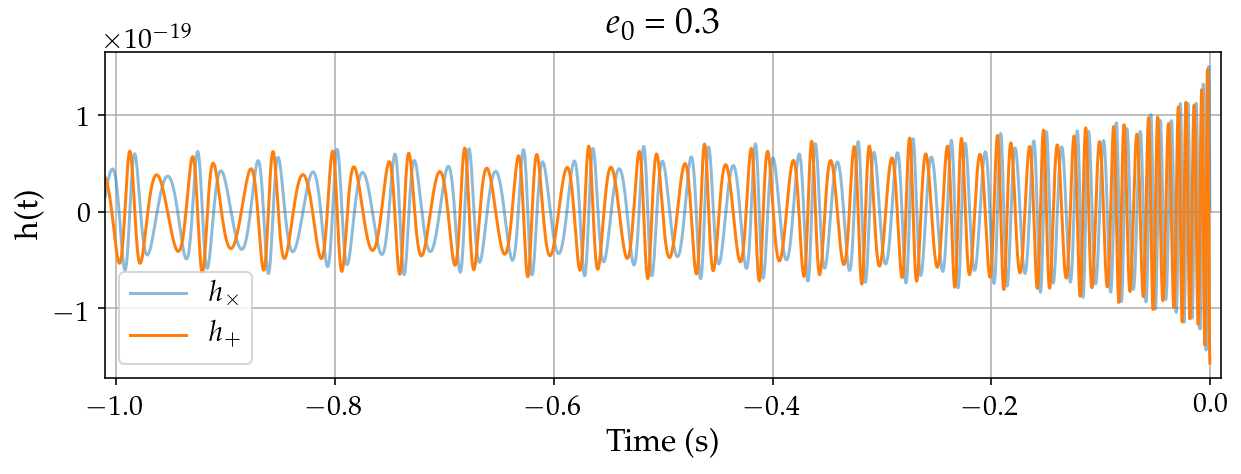

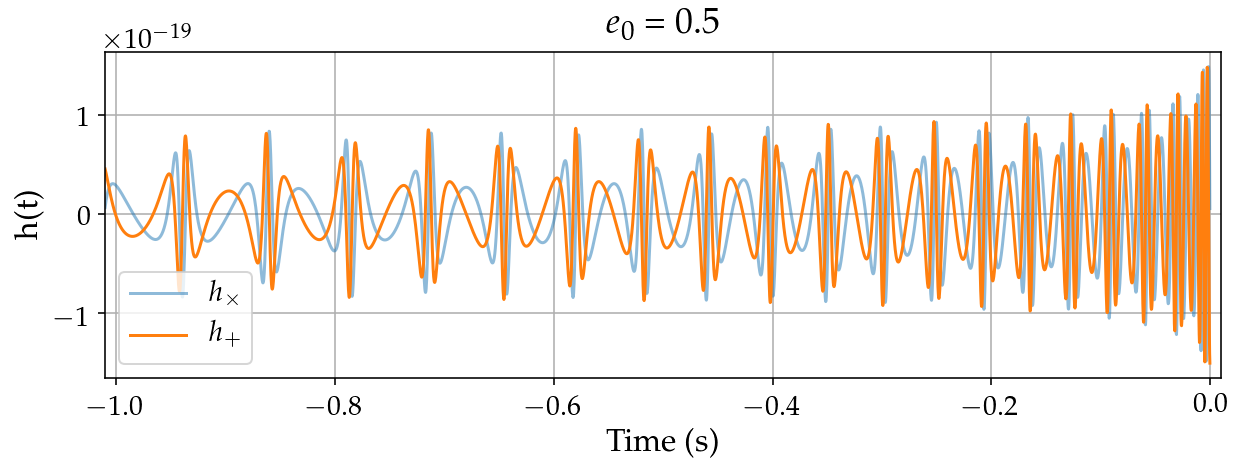

In [34]:
# Plotting 

for e in e0: 
    
    key = e
    
    hp = hpTDdict[key]
    hc = hcTDdict[key]
    
    plt.figure(figsize=(10,3))
    plt.plot(hc.sample_times, hc, label=r'$h_\times$', alpha=0.5)
    plt.plot(hp.sample_times, hp, label=r'$h_+$')
    plt.title(r"$e_0$ = {}".format(key),fontsize=18)
    plt.ylabel('h(t)',fontsize=16)
    plt.xlabel('Time (s)',fontsize=16)
    plt.legend(fontsize=14)
    plt.xlim(-1.01,0.01)
    plt.grid()

In [35]:
# -- IN FREQUENCY DOMAIN --

# Initialize dicts containing h+ and hx time series for each initial eccentricity
hpFDdict = {}
hcFDdict = {}

# Cycle through all initial eccentricities
for e in e0: 
    
    hp, hc = get_fd_waveform(approximant="EccentricFD",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         eccentricity=e,
                         delta_f=1.0/8,
                         f_lower=20)
    
    # Add time series to dict
    key = e
    hpFDdict[key] = hp 
    hcFDdict[key] = hc

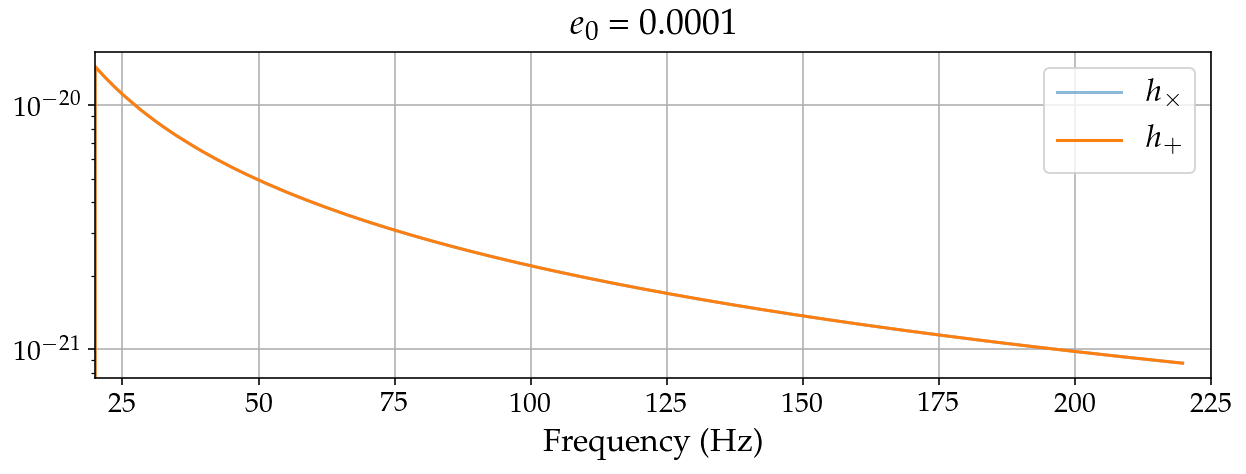

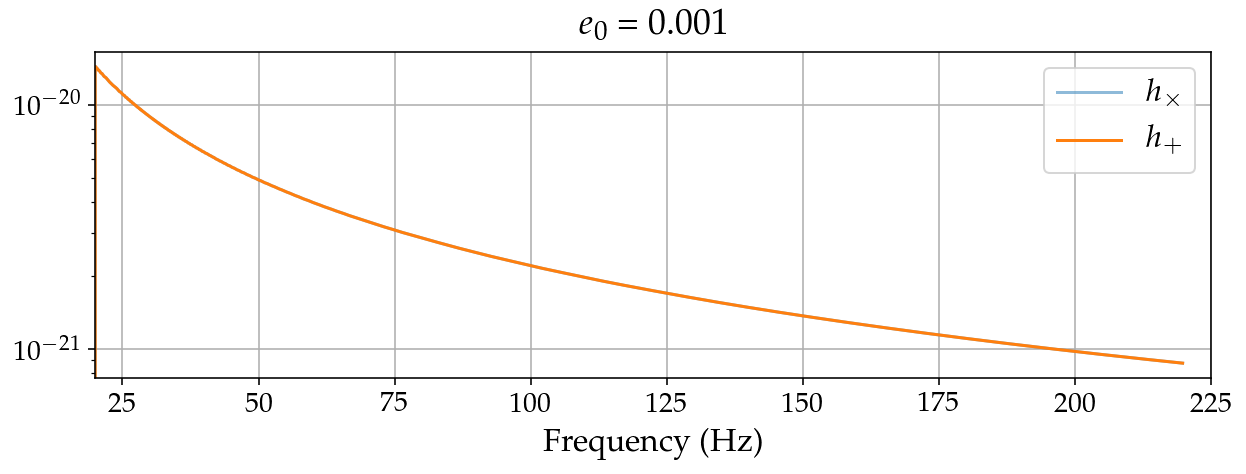

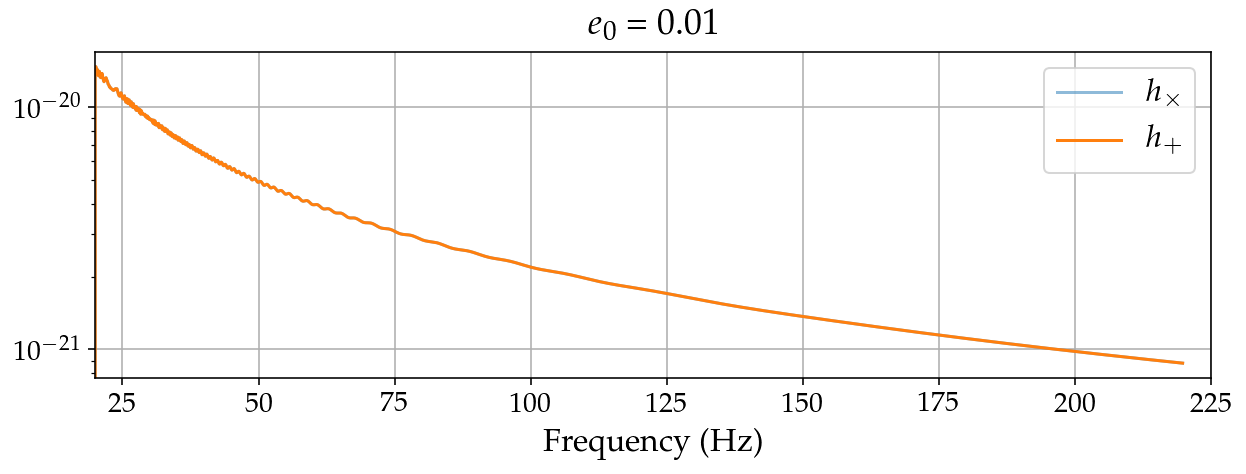

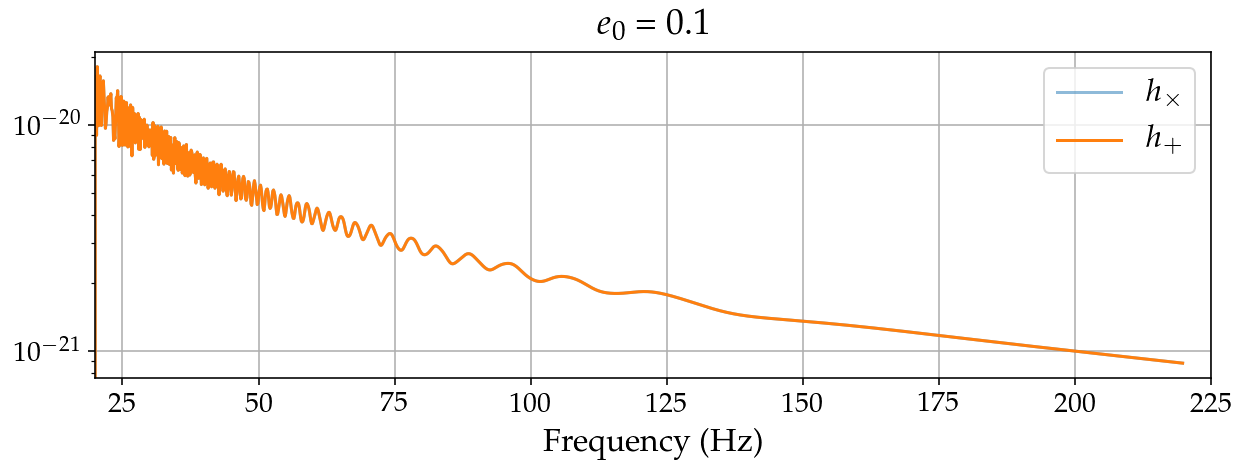

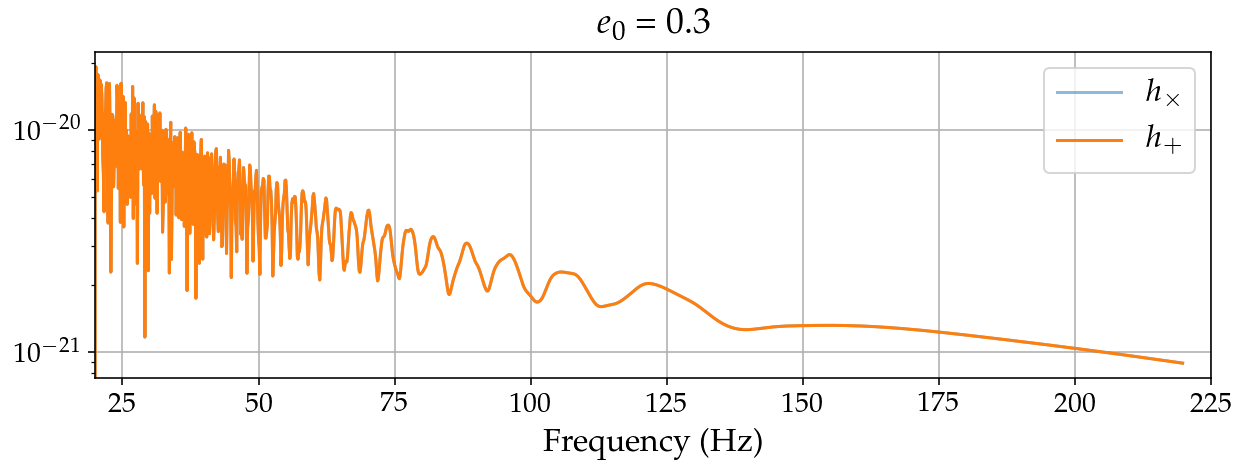

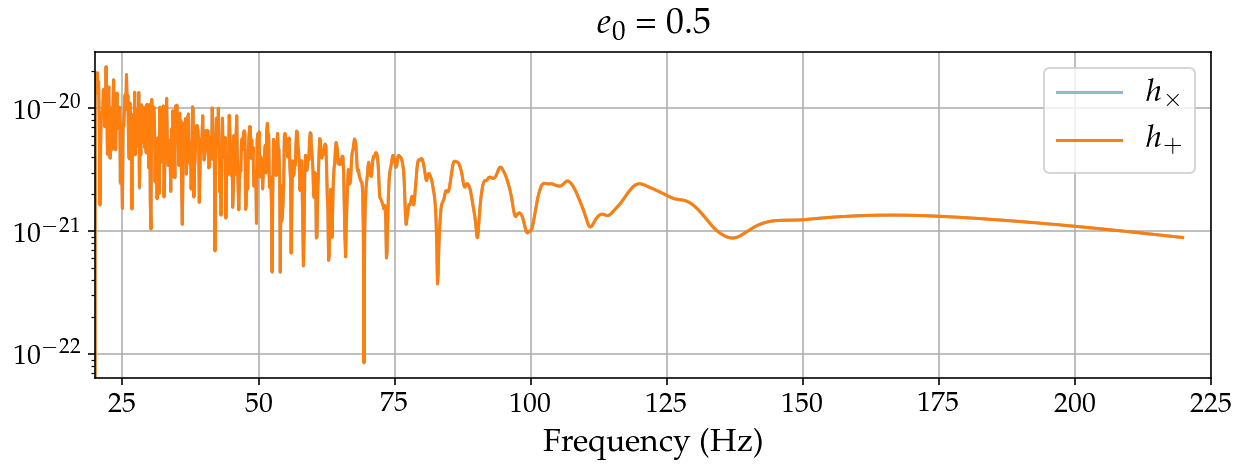

In [39]:
# Plotting 

for e in e0: 
    
    key = e
    
    hp = hpFDdict[key]
    hc = hcFDdict[key]
    
    plt.figure(figsize=(10,3))
    plt.semilogy(hc.sample_frequencies, np.absolute(hc), label=r'$h_\times$', alpha=0.5)
    plt.semilogy(hp.sample_frequencies, np.absolute(hp), label=r'$h_+$')
    plt.title(r"$e_0$ = {}".format(key),fontsize=18)
    #plt.ylabel('h(t)',fontsize=16)
    plt.xlabel('Frequency (Hz)',fontsize=16)
    plt.legend(fontsize=16)
    plt.xlim(20,225)
    plt.grid()

(-0.15, 0.025)

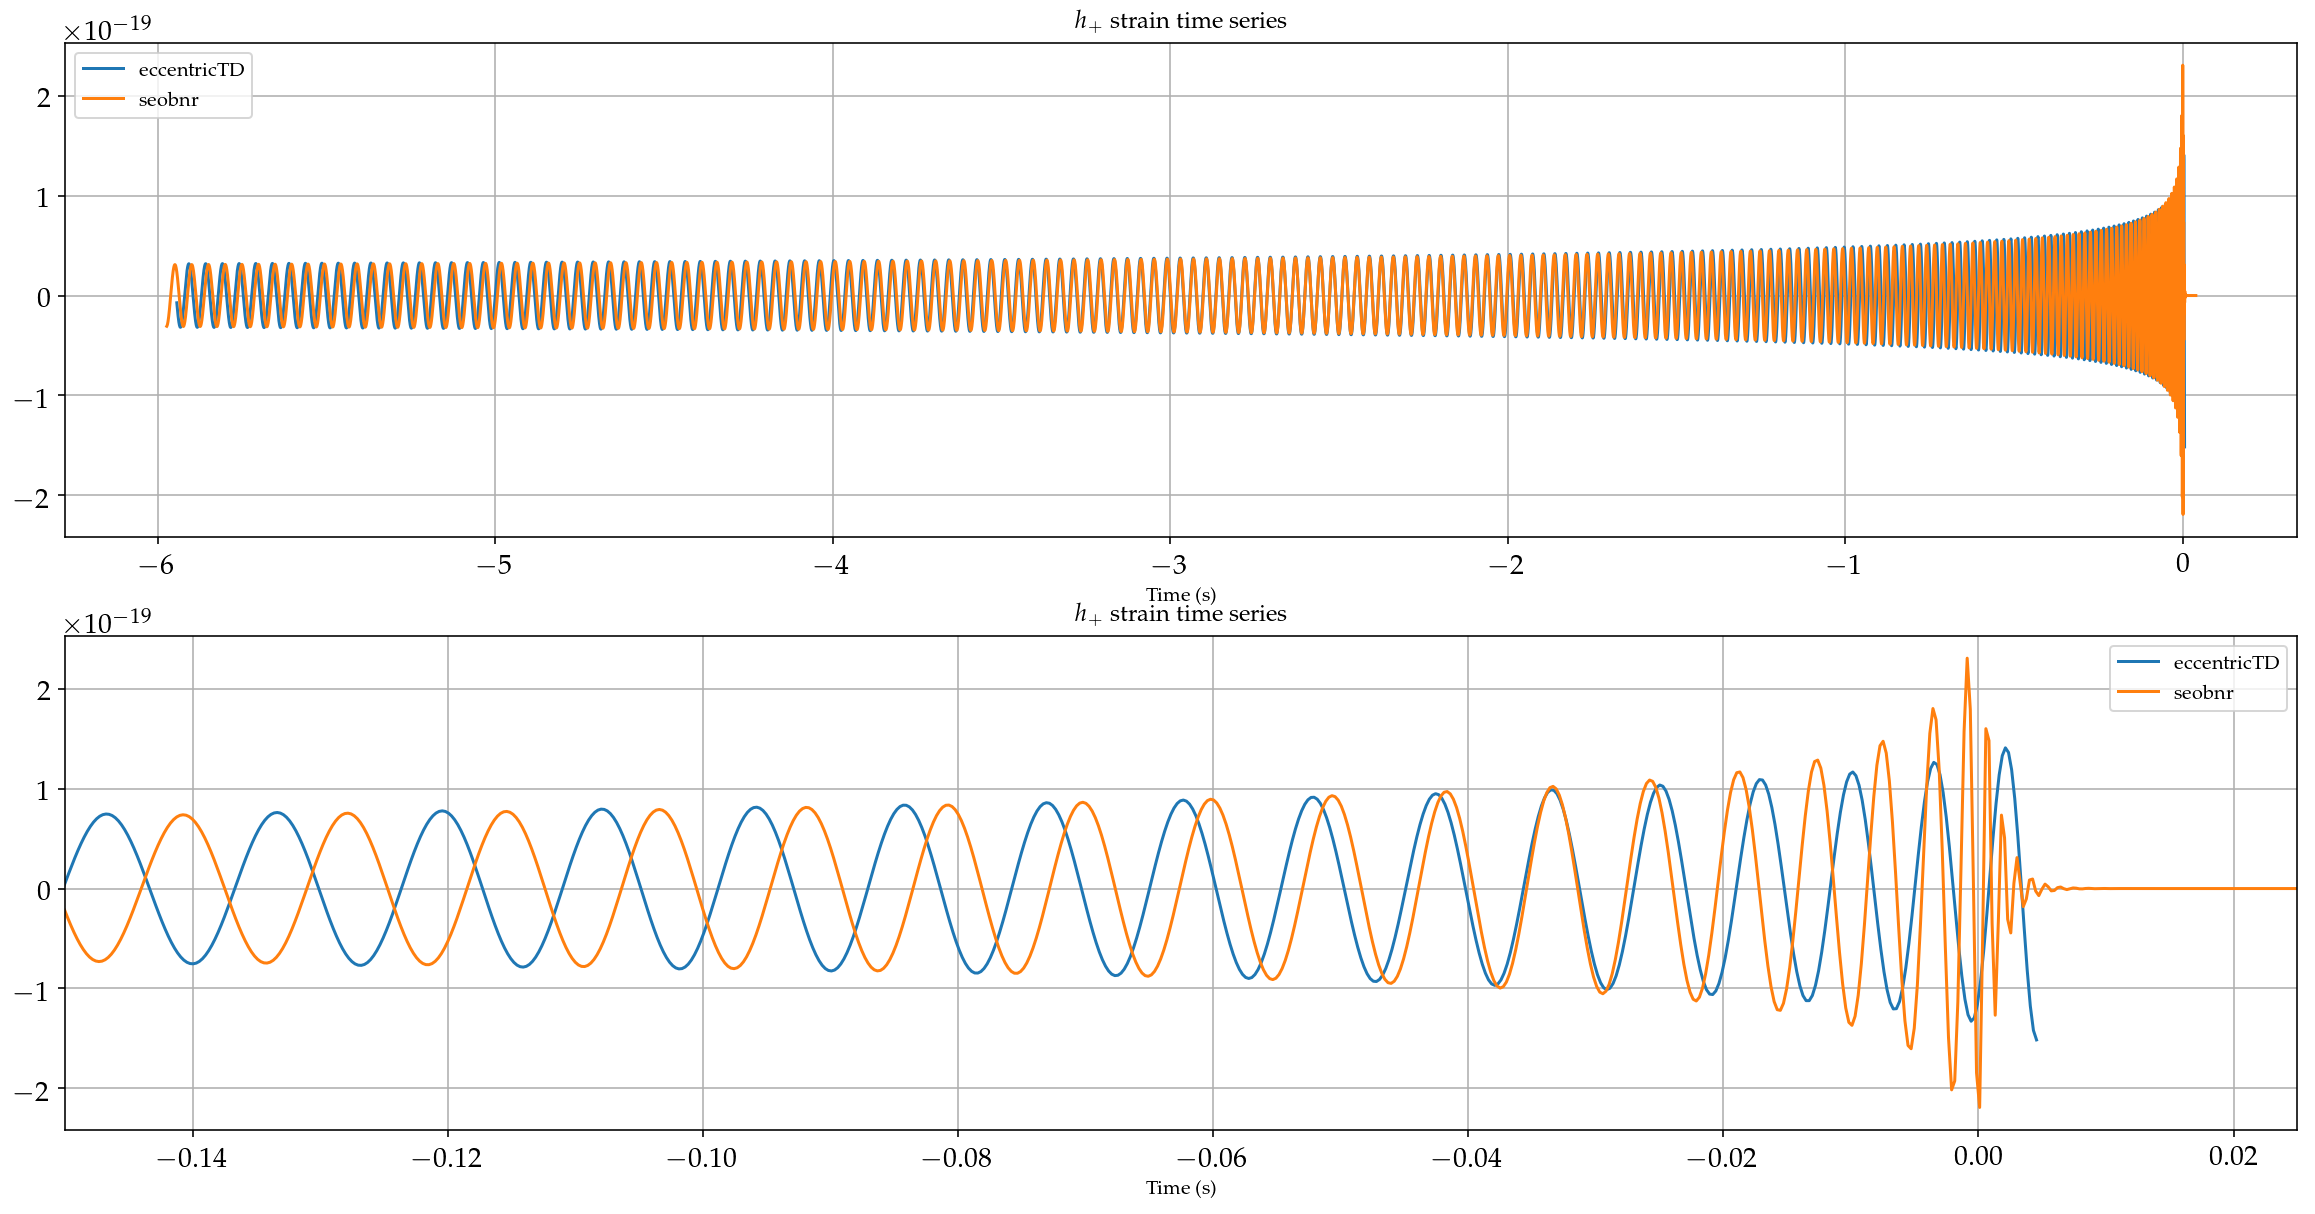

In [37]:
# Looking at waveform approximant without eccencricity
hpnoecc, hcnoecc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=20)

# Comparing to waveform in eccentricTD with e=0.0001 (negligible?)
hpecc = hpTDdict[0.0001]

# Plotting the two waveforms
t0 = 0.0048

plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
plt.plot(hpecc.sample_times+t0, hpecc, label="eccentricTD")
plt.plot(hpnoecc.sample_times, hpnoecc, label="seobnr")
plt.title("$h_+$ strain time series")
plt.xlabel('Time (s)')
plt.legend()
plt.grid()

plt.subplot(2,1,2)
plt.plot(hpecc.sample_times+t0, hpecc, label="eccentricTD")
plt.plot(hpnoecc.sample_times, hpnoecc, label="seobnr")
plt.title("$h_+$ strain time series")
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.xlim(-0.15,0.025)

In [38]:
!lalapps_chirplen -m1 10 -m2 10 -flow 20

/usr/bin/sh: lalapps_chirplen: command not found
